loading /media/horinek/STRATO/palette.data


FileNotFoundError: [Errno 2] No such file or directory: '/media/horinek/STRATO/palette.data'

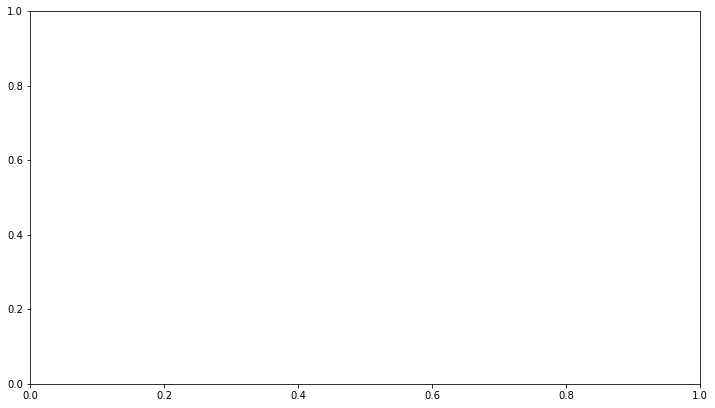

In [13]:
%matplotlib inline
import os
import struct
import math

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_path = "/media/horinek/STRATO"

def open_img(name, df, ax):
    path = os.path.join(base_path, name)
    print("loading %s" % path) 
    
    #load data
    data = open(path, "rb").read()
    print("size %u bytes" % len(data))
    
    if df == "flt":
        size = 4
        fmt = "f"
    elif df == "int":
        size = 2
        fmt = ">h"
    else:
        size = 2
        fmt = "h"
    
    #load values
    values = []
    for index in range(int(len(data) / size)):
        ptr = index * size
        val, = struct.unpack(fmt, data[ptr:ptr + size])
        values.append(val)
    
    #print(values)

    val_max = -math.inf
    val_min = math.inf
    
    if df not in ["col", "pal"]:
        for v in values:
            if v > val_max and not math.isinf(v):
                val_max = v
            if v < val_min and not math.isinf(v):
                val_min = v
                
        delta = val_max - val_min
        if delta == 0:
            delta = 1
        print("min/max/delta", val_min, val_max, delta)

        #normalize
        norm = []
        for v in values:
            if math.isinf(v):
                if v > 0:
                    v = val_max
                if v < 0:
                    v = val_min
            norm.append((v - val_min) / delta)
    else:
        norm = values
    #print(norm)
        
    #convert
    img_data = []
    row = []
    
    if df == "pal":
        width = len(norm) + 1
    else:
        width = int(math.sqrt(len(norm)))
        
    print("width", width)
    
    for n in norm:
        if df in ["col", "pal"]:
            r = ((0b1111100000000000 & n) >> 11) / 0x1F
            g = ((0b0000011111100000 & n) >> 5) / 0x3F
            b = ((0b0000000000011111 & n) >> 0) / 0x1F
            rgb = [r, g, b]
        else:
            rgb = [n, n, n]
        row.append(rgb)
        if len(row) == width:
            img_data.append(row)
            row = []
            
    #display
    if df == "pal":
        for __ in range(20):
            img_data.append(row)
#         print(img_data)
    
    imgplot = ax.imshow(img_data)
    print()
    
    return values

plt.rcParams['figure.figsize'] = [12, 12 * 4]    
    
fig = plt.figure()
fig.subplots_adjust(hspace=0, wspace=0)

h = 7
w = 1
    
open_img("palette.data", "pal", fig.add_subplot(h, w, 1))
open_img("kernel.data", "flt", fig.add_subplot(h, w, 2))
open_img("step1.data", "flt", fig.add_subplot(h, w, 3))
open_img("step2.data", "col", fig.add_subplot(h, w, 4))
open_img("step3.data", "flt", fig.add_subplot(h, w, 5))
open_img("step4.data", "flt", fig.add_subplot(h, w, 6))
open_img("step5.data", "col", fig.add_subplot(h, w, 7));

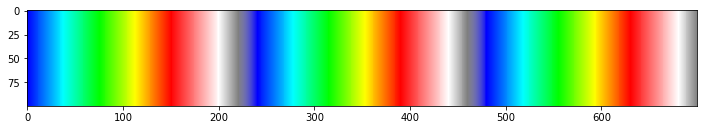

In [68]:
import colorsys

def hsv(h, s, v):
    h = (h + 360) % 360
    return colorsys.hsv_to_rgb(h / 360, s / 100, v / 100)


points = []
points.append([240, 100, 100, 150])
points.append([0, 100, 100, 50])
points.append([0, 0, 100, 20])
points.append([240, 0, 50, 20])
points.append([240, 100, 100, 150])
points.append([0, 100, 100, 50])
points.append([0, 0, 100, 20])
points.append([240, 0, 50, 20])
points.append([240, 100, 100, 150])
points.append([0, 100, 100, 50])
points.append([0, 0, 100, 20])
points.append([240, 0, 50, 20])


palete = []

for i in range(len(points) - 1):
    h1, s1, v1, steps = points[i]
    h2, s2, v2, __ = points[i+1]
    for j in range(steps):
        h = h1 + j * (h2-h1) / steps
        s = s1 + j * (s2-s1) / steps
        v = v1 + j * (v2-v1) / steps
        palete.append(hsv(h, s, v))
    
    
row = []
for v in palete:
    row.append(v)
img = [row] * 100

plt.imshow(img)

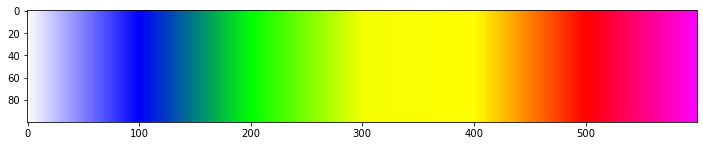

In [35]:
import colorsys

st = 100

points = []
points.append([255, 255, 255, st])
points.append([0, 0, 255, st])
points.append([0, 255, 0, st])
points.append([244, 255, 0, st])
points.append([255, 255, 0, st])
points.append([255, 0, 0, st])
points.append([255, 0, 255, 0])
palete = []

for i in range(len(points) - 1):
    r1, g1, b1, steps = points[i]
    r2, g2, b2, __ = points[i+1]
    for j in range(steps):
        r = r1 + j * (r2-r1) / steps
        g = g1 + j * (g2-g1) / steps
        b = b1 + j * (b2-b1) / steps
        palete.append((r / 255.0, g / 255.0, b / 255.0))
   
row = []
for v in palete:
    row.append(v)
img = [row] * 100

plt.imshow(img)

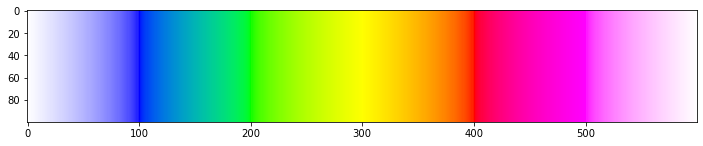

In [41]:
import colorsys
import math

st = 100

points = []
points.append([255, 255, 255, st])
points.append([0, 0, 255, st])
points.append([0, 255, 0, st])
points.append([255, 255, 0, st])
points.append([255, 0, 0, st])
points.append([255, 0, 255, st])
points.append([255, 255, 255, st])
palete = []

for i in range(len(points) - 1):
    r1, g1, b1, steps = points[i]
    r1 *= r1
    g1 *= g1
    b1 *= b1
    r2, g2, b2, __ = points[i+1]
    r2 *= r2
    g2 *= g2
    b2 *= b2
    
    for j in range(steps):
        r = math.sqrt(r1 + j * (r2-r1) / steps)
        g = math.sqrt(g1 + j * (g2-g1) / steps)
        b = math.sqrt(b1 + j * (b2-b1) / steps)
        rgb = (r / 255.0, g / 255.0, b / 255.0)

        palete.append(rgb)
   
row = []
for v in palete:
    row.append(v)
img = [row] * 100

plt.imshow(img)

loading ../../../BB_map_sim/fake_strato/agl/N48E017.hgt
size 2884802 bytes
min/max/delta 96 970 874
width 1201



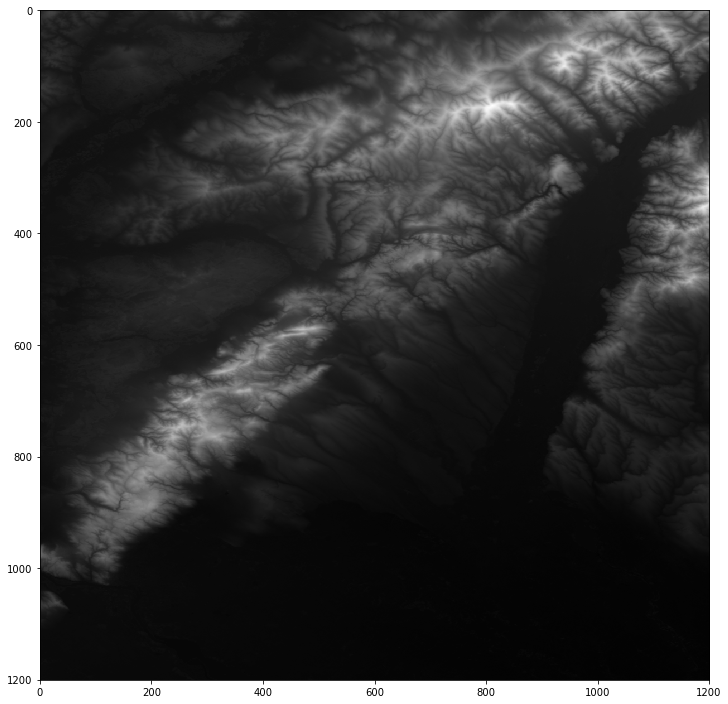

In [124]:
data = open_img("agl/N48E017.hgt", "int", plt)

In [125]:
data[0]

223